<a href="https://colab.research.google.com/github/Aziz-Th/Image_Search/blob/main/AbdulazizAlthumairyWeek1Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1: Submit a write-up on the following:

- Hugging face agents

- Hugging face pipeline for text generation

- HF inference endpoints

- Give feedback on the image generation and explore different models available on the Hugging Face website



#Assignment 2: Using OpenAI's CLIP Model for Image Captioning and Building an Image Search Engine

#Objective

##In this assignment, you will use OpenAI's CLIP (Contrastive Language-Image Pre-training) model to:
- Generate captions for 15 different images.
- Build a search engine for these images using a larger dataset of images.


##Part 1: Generate Captions for Images

##Part 2: Build an Image Search Engine


##Submission
Submit the following as a **Streamlit** app:

- Your Python code for generating captions and building the search engine.
- A report describing your approach, challenges faced, and how you overcame them.
- Screenshots of the interface and results.

Evaluation Criteria

- Correctness and efficiency of the code.
- Clarity and completeness of the report.
- Usability and functionality of the search engine interface.

#Please don't use any Generative AI Models

##Hugging face agents

agents are a type of software that will make use of the tools it have at it disposle in order to satisfy the needs of the user, for example:


*   an agent has access to a calculater and will perform calculations when the user asks arithmatic questions
*   and just like the example we did earlier for image generation it will write an image generation prompt and send to an image generation model when the user asks for that
so in general (I know its a chatgpt slang, but i like it) an agent will use the necesssary tools when needed




---

##Hugging face pipeline for text generation
helps with organizing the models needed for doing a specific task , they simplify the way we use models by providing abstractions for tools that we use like tokenizers and models


---

##HF inference endpoints

hf inference endpoints are a way to use AI models hosted on hugging face without the need to download them on your machine.


---

##Give feedback on the image generation and explore different models available on the Hugging Face website

the image generation we did with "m-ric/text-to-image" gave very good results actually and i wish to try and modify the params of the models to see what diffrent results it will yield

In [ ]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")



urls = [
    "https://images.pexels.com/photos/47547/squirrel-animal-cute-rodents-47547.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/792381/pexels-photo-792381.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/34231/antler-antler-carrier-fallow-deer-hirsch.jpg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/62289/yemen-chameleon-chamaeleo-calyptratus-chameleon-reptile-62289.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/67552/giraffe-tall-mammal-africa-67552.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/162140/duckling-birds-yellow-fluffy-162140.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/635499/pexels-photo-635499.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/326012/pexels-photo-326012.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/847393/pexels-photo-847393.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/572861/pexels-photo-572861.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/39857/leopard-leopard-spots-animal-wild-39857.jpeg",
    "https://images.pexels.com/photos/45853/grey-crowned-crane-bird-crane-animal-45853.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/86405/penguin-funny-blue-water-86405.jpeg",
    "https://images.pexels.com/photos/460775/pexels-photo-460775.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2",
    "https://images.pexels.com/photos/70080/elephant-africa-african-elephant-kenya-70080.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2"
    ]

images = [
    Image.open(requests.get(url, stream=True).raw) for url in urls]





/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a squirrel eating a nut on a mossy surface


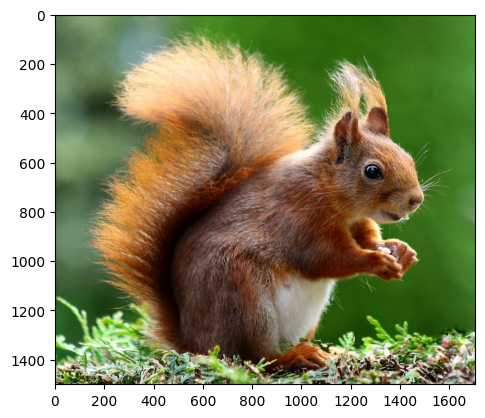

a green bird perched on a branch


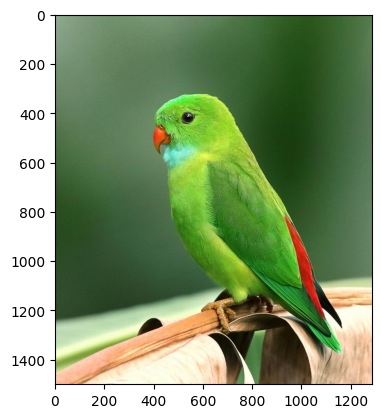

a tiger laying down on the ground


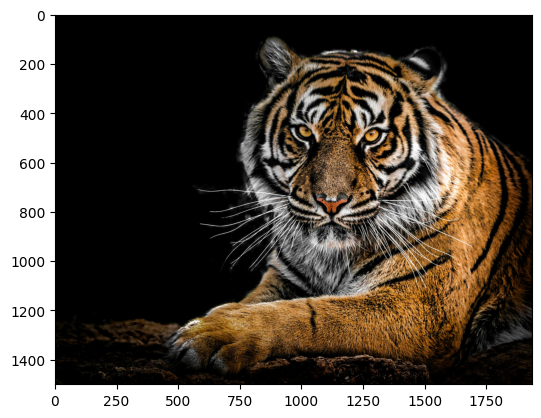

a deer laying in the grass


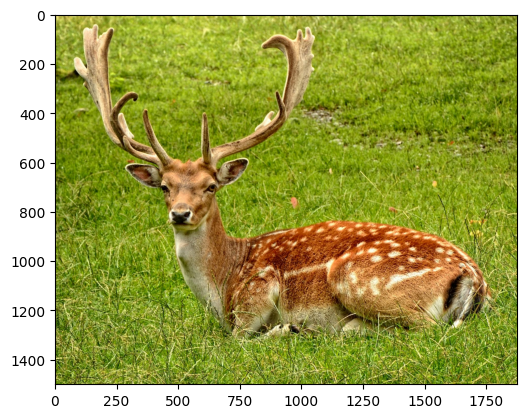

a green and orange lizard


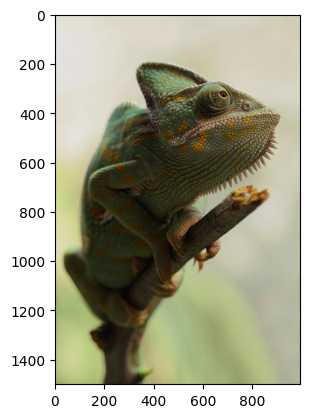

a gi gi gi gi gi gi gi gi gi gi gi gi gi gi gi gi gi gi


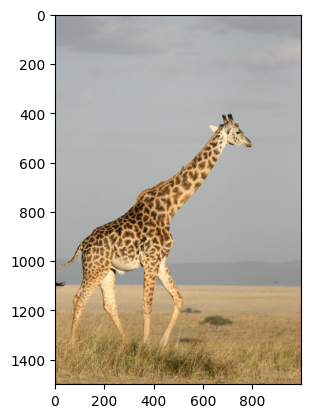

a small yellow duck


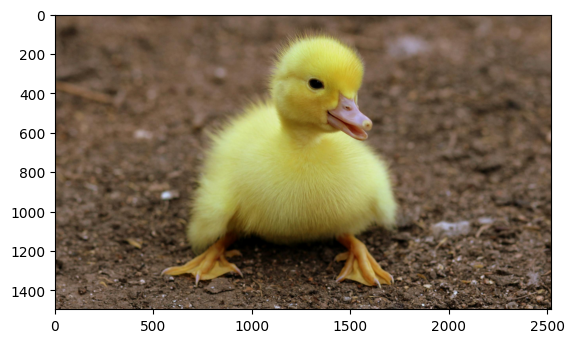

a horse standing on a grassy hill


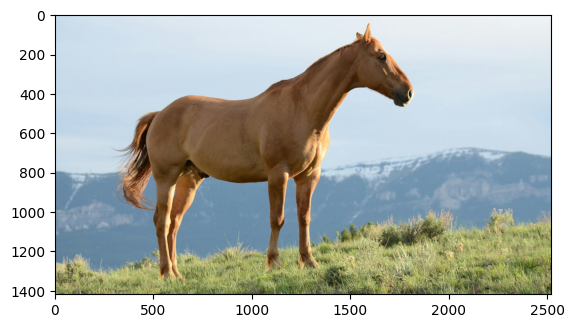

a small rabbit sitting on top of a green grass field


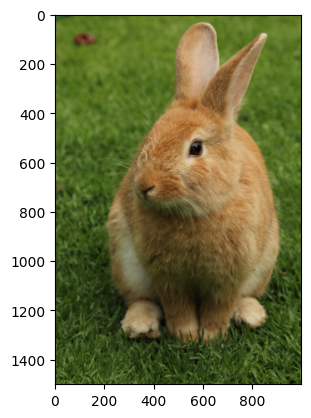

a turtle swimming in the ocean


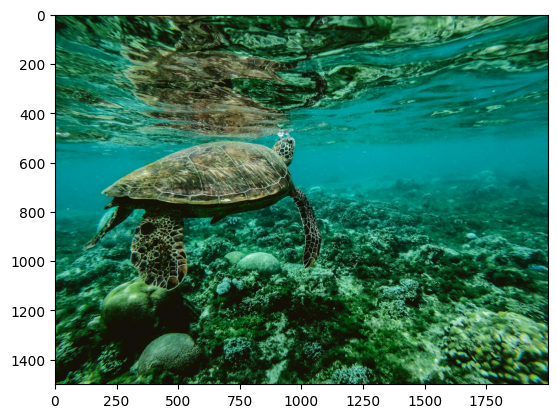

a tiger walking on a log


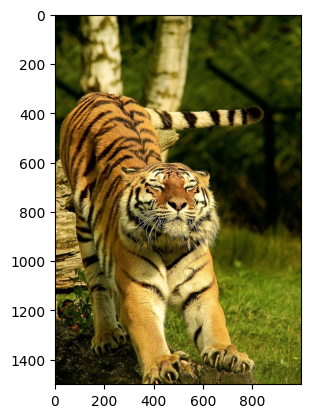

a leopard walking across a dirt covered field


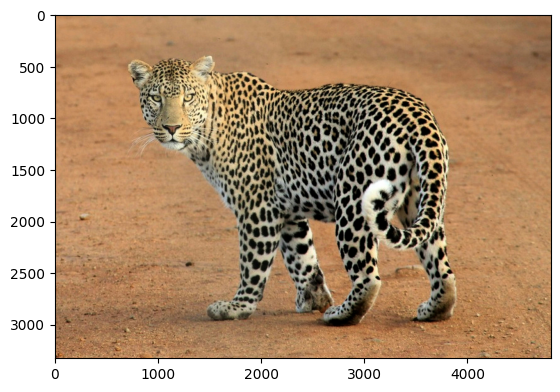

two birds with feathers on their heads


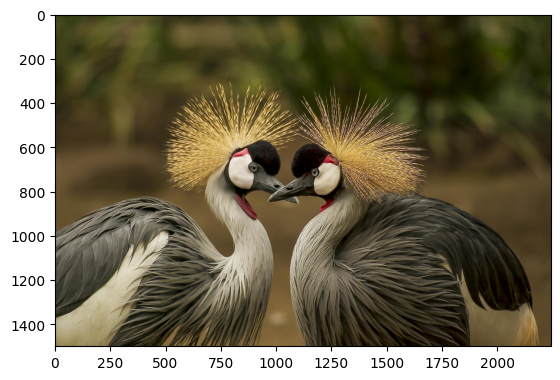

a penguin standing on a snow covered ground


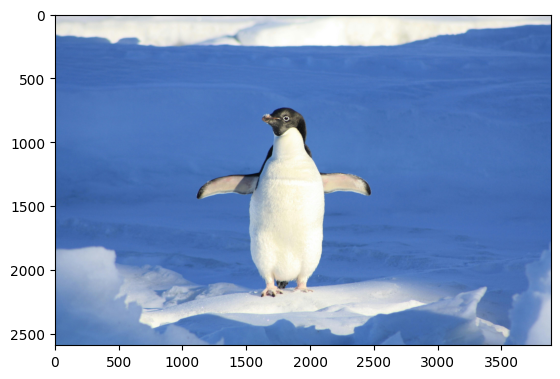

a squirrel is standing on a table with a bowl of food


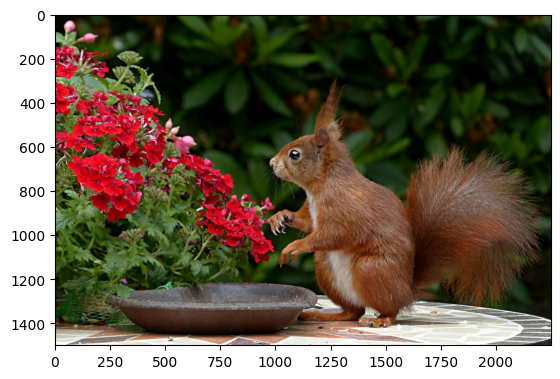

an elephant with a red dust in its mouth


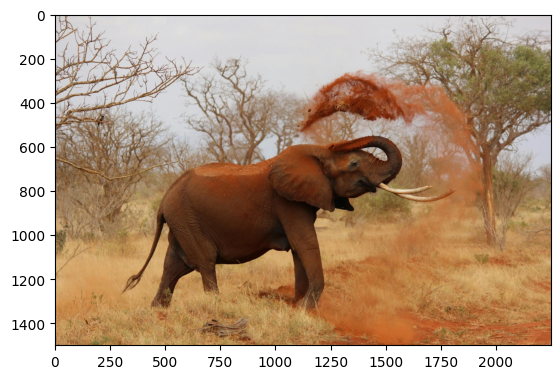

In [ ]:
# conditional image captioning
images_with_captions = []
# inputs = processor(images[0],  return_tensors="pt")
for i, image in enumerate(images):
    inputs = processor(image, return_tensors="pt")
    out = model.generate(**inputs)
    images_with_captions.append([processor.decode(out[0], skip_special_tokens=True),image])
    print(processor.decode(out[0], skip_special_tokens=True))
    plt.show(plt.imshow(np.asarray(image)))

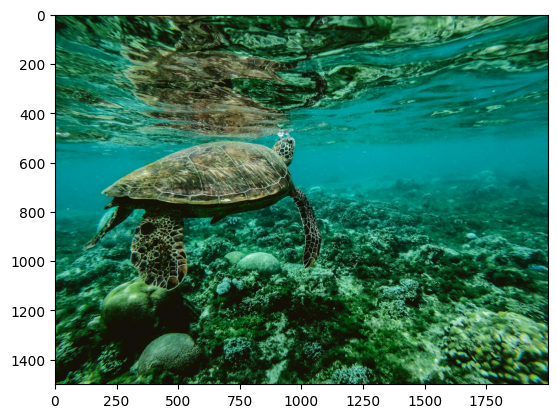

In [ ]:
def calculate_cosine_similarity(sentence1, sentence2):
    word_set = set(sentence1.split() + sentence2.split())

    vector1 = np.array([sentence1.split().count(word) for word in word_set])
    vector2 = np.array([sentence2.split().count(word) for word in word_set])

    dot_product = np.dot(vector1, vector2)

    magnitude1 = np.linalg.norm(vector1)
    magnitude2 = np.linalg.norm(vector2)


    cosine_similarity = dot_product / (magnitude1 * magnitude2)

    return cosine_similarity



query = "turtle"
highest_similarity = 0
most_similar_image = None
for image in images_with_captions:
  if calculate_cosine_similarity(query, image[0]) > highest_similarity:
    highest_similarity = calculate_cosine_similarity(query, image[0])
    most_similar_image = image

# print(most_similar_image[0]) if most_similar_image else print("No image found")
plt.show(plt.imshow(np.asarray(most_similar_image[1]))) if most_similar_image else print("No image found")

